# Naive Bayes

## Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import os
import re

## Data Preprocessing

In [7]:
path = os.getcwd()
print(path)

/home/pavan/Desktop/Projects/ML-assignment/Naive-Bayes


In [8]:
file1 = open('dataset_NB.txt', 'r')
Lines = file1.readlines()

<b>Insert data from txt file to a dictionary.
Sepearte out the Labels.</b>

In [9]:
dict_data = {'text':[], 'label':[]}
for i in Lines:
  label = i[-2]
  string = i[:-2]
  dict_data['text'].append(string)
  dict_data['label'].append(label)
dict_data['label'][-1] = '0'

In [10]:
dict_data['text'][:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.  ',
 'Good case, Excellent value. ',
 'Great for the jawbone.  ',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! ',
 'The mic is great.   ',
 'I have to jiggle the plug to get it to line up right to get decent volume.  ',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. ',
 'If you are Razr owner...you must have this! ',
 'Needless to say, I wasted my money. ',
 'What a waste of money and time!.    ']

In [11]:
dict_data['label'][:10]

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']

<b>Create a Dataframe with the data from "dict_data".
Then, visualize the data.</b>

In [12]:
df = pd.DataFrame(dict_data)

In [36]:
df

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [13]:
df.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [14]:
n = df['label'].value_counts()
n = n.to_numpy()

<b>As shown below, there are 500 lines with postive and 500 lines with negitive sentiment.
This is an eqaully distributed dataset.</b>

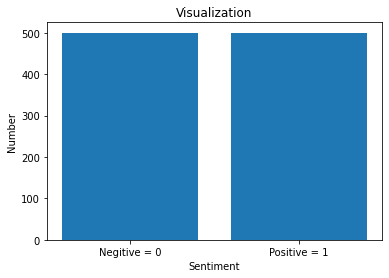

In [15]:
plt.bar(['Negitive = 0','Positive = 1'], n)
plt.xlabel('Sentiment')
plt.ylabel('Number')
plt.title('Visualization')
plt.show()

<b>Function Defined for processing the text data. This includes:
    <ol>
        <li>Removing stop words</li>
        <li>Removing commas, fullstops, hyphens</li>
        <li>Numerical Data</li>
    </ol>
</b>

In [16]:
def data_preprocess(textdata):
    Processed =[]

    alphaPattern = r"[^\w\s]"
    numPattern = r"[\d]"
    sequenceFind = r"(.)\1\1+"
    sequenceReplace = r"\1\1"

    for line in textdata:
        line = line.lower()
        line = re.sub(alphaPattern, ' ', line)
        line = re.sub(numPattern, ' ', line)
        line = re.sub(sequenceFind, sequenceReplace, line)

        lineWords = ''
        for text in line.split():
            if len(text)>2:
                lineWords += (text +' ')

        Processed.append(lineWords)

    return Processed

In [17]:
dict_data['text'] = data_preprocess(dict_data['text'])

In [18]:
dict_data['text'][0:10]

['there way for plug here the unless converter ',
 'good case excellent value ',
 'great for the jawbone ',
 'tied charger for conversations lasting more than minutes major problems ',
 'the mic great ',
 'have jiggle the plug get line right get decent volume ',
 'you have several dozen several hundred contacts then imagine the fun sending each them one one ',
 'you are razr owner you must have this ',
 'needless say wasted money ',
 'what waste money and time ']

## Vectorizer

<b>Created a list of stop words, which do not contribute to the sentiment of a text.</b>

In [19]:
stop_words = ['hasn', 'few', "you're", 'which', 'having', 'aren', 'did', 'through', 'only', "couldn't", 'if', 'until', 'when', 'below', 'll', 'yourselves', 'their', 't', 'do', 're', 'couldn', 'doing', 'weren', 'he', 'they', 'just', 'isn', 'mustn', 'itself', 'but', 'haven', 'with', "you'd", 'where', "that'll", 'd', 'wouldn', 'once', 'am', 'is', 'on', 'she', 'such', 'won', 'was', 'being', 'ain', 'too', "you'll", 'each', 'are', 'ma', 'again', "it's", 'what', 'has', 'wasn', 'does', 'ours', 'now', 'them', "wasn't", 'you', 'above', 'from', 'can', 'will', 'theirs', 'because', 'mightn', 'i', 'off', 'shouldn', "weren't", 'doesn', 'him', "wouldn't", "mustn't", 'here', 'be', 'been', 'not', 'as', 'her', 'so', 'after', 'why', "isn't", 'his', 's', 'who', 'up', 'whom', "shouldn't", "you've", 'further', 'both', 'have', 've', 'then', 'all', "don't", 'that', 'm', 'very', "doesn't", 'and', 'while', "haven't", 'some', 'themselves', 'herself', "needn't", 'this', 'how', 'against', 'own', 'o', 'down', 'those', 'had', 'other', "didn't", 'were', 'to', 'there', 'yourself', "hadn't", 'for', 'of', 'at', 'no', 'most', 'in', 'or', 'more', 'your', 'should', "won't", 'any', 'it', "hasn't", 'by', 'the', 'himself', 'than', 'ourselves', 'under', "shan't", 'these', 'me', "mightn't", 'a', 'about', 'nor', 'before', 'hadn', 'didn', 'out', 'our', 'don', 'needn', 'same', 'hers', 'y', 'my', 'we', 'during', 'shan', 'over', 'an', "should've", 'its', "aren't", 'between', 'into', 'myself', 'yours', "she's"]

In [20]:
label = dict_data['label']
for i in range(0, len(label)): 
    label[i] = int(label[i]) 
dict_data['label'] = label

In [21]:
def vectorizer(data, label):
    '''
    Takes a list of sentences as input.
    Returns a dictionary containing unique words as keys and their respective count as values.
    '''
    dict_words = {}
    
    for line, label in zip(data, label):
        for text in line.split():
            if text not in stop_words:
                pair = (text, label)
                if pair in dict_words.keys():
                    dict_words[pair] += 1
                else:
                    dict_words[pair] = 1
    
    return dict_words        

In [22]:
dict_words = vectorizer(dict_data['text'], dict_data['label'])

## Train Test Split

<b> Split the data given into train data and test data. Here train is of size (0.7*(size of dataset)) and test size is (0.3*(size of dataset)).</b>

In [23]:
train_size = int(0.7*(len(dict_data['text'])))
X_train = dict_data['text'][:train_size]
Y_train = dict_data['label'][:train_size]
X_test = dict_data['text'][train_size:]
Y_test = dict_data['label'][train_size:]

In [24]:
n = pd.DataFrame({'sentiments': Y_train})['sentiments'].value_counts()
print(n)
n = n.to_numpy()

1    356
0    344
Name: sentiments, dtype: int64


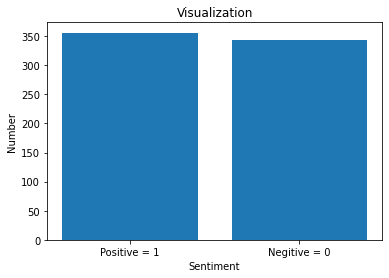

In [25]:
plt.bar(['Positive = 1','Negitive = 0'], n)
plt.xlabel('Sentiment')
plt.ylabel('Number')
plt.title('Visualization')
plt.show()

## Naive Bayes Model

In [239]:
class NaiveBayesAlgo:

    def __init__(self, alpha=1):
        self.vocab={}
        self.prob_pos_words = {}
        self.prob_neg_words = {}  
        self.pos_count = 0
        self.neg_count = 0
        self.pos_prior = 0
        self.neg_prior = 0
        self.alpha = alpha

        

    def fit(self, X, Y, vectorized, initialize=False):
        '''
        Function to train our model.
        X = List of input sentences
        Y = List of labels for input sentences
        vectorized = Dictionary of counts of each unique word with their respective labels
        '''

        if initialize:
            self.vocab = {}
            self.prob_pos_words = {}
            self.prob_neg_words = {}
            self.pos_count = 0
            self.neg_count = 0
            self.pos_prior = 0
            self.neg_prior = 0
        
        self.vocab = vectorized

        self.pos_count = pd.DataFrame({'sentiments': Y})['sentiments'].value_counts()[0]
        self.neg_count = pd.DataFrame({'sentiments': Y})['sentiments'].value_counts()[1]
                        
        voc_len = len(list(self.vocab.keys()))
        for key in list(self.vocab.keys()):
            if key[1]==1:
                self.prob_pos_words[key[0]] = (self.vocab[key] + self.alpha) / (self.pos_count + (self.alpha * voc_len))

            if key[1]==0:
                self.prob_neg_words[key[0]] = (self.vocab[key] + self.alpha) / (self.neg_count + (self.alpha * voc_len))

        
        self.pos_prior = self.pos_count/(self.pos_count + self.neg_count)
        self.neg_prior = self.neg_count/(self.pos_count + self.neg_count)
        
        
    def predict(self, X):
        '''
        Input a list containing preprocessed tweets.
        '''
        
        pos_prob = self.pos_prior
        neg_prob = self.neg_prior
        y_true=[]
        for i in range(len(X)):
            for word in X[i].split():
                if word in list(self.prob_pos_words.keys()):
                    if self.prob_pos_words[word]>0:
                        pos_prob *= self.prob_pos_words[word]

                if word in list(self.prob_neg_words.keys()):
                    if self.prob_neg_words[word]>0:
                        neg_prob *= self.prob_neg_words[word]


            if pos_prob <= neg_prob:
                y_true.append(1)
            else:
                y_true.append(0)
            pos_prob = self.pos_prior
            neg_prob = self.neg_prior
            

        return y_true
    
    
    def cross_val(self, k, data):
        '''
        k-fold validation on the given data.
        Data: Dictionary of values containing text and their sentiment labels, ie, 0 and 1.
        '''
        
        for i in range(k):
            
            train_size = int(0.7*(len(dict_data['text'])))
            X_train = dict_data['text'][:train_size]
            Y_train = dict_data['label'][:train_size]
            X_test = dict_data['text'][train_size:]
            Y_test = dict_data['label'][train_size:]
            
            self.fit(X_train, Y_train, dict_words, initialize=True)
            
            self.evaluate(X_test, Y_test)
        
    
    def evaluate(self, x_test, y_test):
        '''
        Funciton to evaluate our model.
        '''

        y_pred = self.predict(x_test)
        dict = self.report(y_test, y_pred)
        print('Classification Report') 
        n = np.array(list(dict.items()))
        df = pd.DataFrame(n[:,1], index=n[:,0], columns=[''])
        print(df)
        self.confusion_matrix(dict)
        
    
    def report(self, y_pred, y_test):
        '''
        Input: list of predicted and true labels.
        Ouput: Dictionary of TP, TN, FP, FN, Total, Accuracy, Recall, Precision
        '''
        
        TP=0
        TN=0
        FP=0
        FN=0
        Total=len(y_pred)
        for pred, test in zip(y_pred, y_test):
            if pred==test:
                if pred==0:
                    TN+=1
                else:
                    TP+=1
            else:
                if pred==1:
                    FP+=1
                else:
                    FN+=1
        
        accuracy = (TP+TN) / Total
        recall = TP / (TP+FN)
        precision = TP / (TP+FP)
        
        return {'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN, 'Total':Total, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision}
        
    def confusion_matrix(self, report_val):
        '''
        Confusion Matrix of the given data.
        '''
        
        fig, ax = plt.subplots()
        classes = ['Positive', 'Negitive']
        t = report_val['Total']
        report = np.array([[report_val['TN']/t, report_val['FP']/t], [report_val['FN']/t, report_val['TP']/t]])
        im = ax.imshow(report, cmap = 'Blues')

        ax.set_xticks(np.arange(len(classes)))
        ax.set_yticks(np.arange(len(classes)))

        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)


        plt.setp(ax.get_xticklabels(), rotation_mode="anchor")
        
        group_names = ['True Neg','False Pos', 'False Neg','True Pos']
        group_percentages = ['{0:.2%}'.format(value) for value in report.flatten()]

        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        for i in range(len(classes)):
            for j in range(len(classes)):
                text = ax.text(j, i, labels[i, j], ha="center", va="center")

        ax.set_title('Confusion Matrix', fontdict = {'size':18}, pad = 20)
        
        fig.tight_layout()
        plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
        plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
        plt.show()
        

## Training

In [240]:
NB = NaiveBayesAlgo()

In [241]:
%%time
NB.fit(X_train, Y_train, dict_words, initialize=True)

CPU times: user 6.73 ms, sys: 0 ns, total: 6.73 ms
Wall time: 6.52 ms


In [242]:
print(NB.pos_prior, NB.neg_prior, NB.pos_count, NB.neg_count)

0.49142857142857144 0.5085714285714286 344 356


## Evaluation

Classification Report
                             
TP                         98
TN                        139
FP                         46
FN                         17
Total                     300
Accuracy                 0.79
Recall     0.8521739130434782
Precision  0.6805555555555556


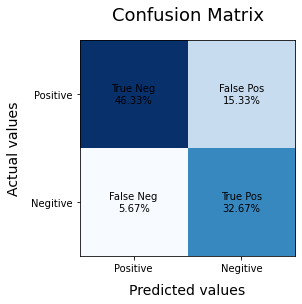

In [243]:
NB.evaluate(X_test, Y_test)

In [208]:
test = X_test[0:10]
test_y = Y_test[0:10]
print(NB.predict(test))
print(test_y)

[0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1]


In [33]:
test = X_train[0:10]
test_y = Y_train[0:10]
print(NB.predict(test))
print(test_y)

[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [34]:
test = ['there way for plug here the unless converter ',
 'good case excellent value ',
 'great for the jawbone ']
NB.predict(test)

[0, 1, 1]